In [ ]:
pip install librosa

In [27]:
import librosa
import numpy as np
import pandas as pd

file = '/Users/daniel/Desktop/TMR/overnight_record/001.m4a'
data,sample_rate = librosa.load(file)

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_2087/1781981983.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  data,sample_rate = librosa.load(file)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [18]:
def denoise_audio(audio_path, output_path):
    # 오디오 파일 불러오기
    audio, sr = librosa.load(audio_path, sr=None)
    
    # 스펙트로그램 계산
    spectrogram = np.abs(librosa.stft(audio))
    
    # 스펙트로그램을 기반으로 노이즈 마스크 생성
    noise_mask = np.mean(spectrogram, axis=1) < 0.01
    
    # 노이즈 마스크를 이용하여 스펙트로그램 수정
    denoised_spectrogram = spectrogram.copy()
    denoised_spectrogram[noise_mask] = 0
    
    # 수정된 스펙트로그램을 이용하여 음성 데이터 복원
    denoised_audio = librosa.istft(denoised_spectrogram)
    
    # 복원된 음성 데이터 저장
    librosa.output.write_wav(output_path, denoised_audio, sr)

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

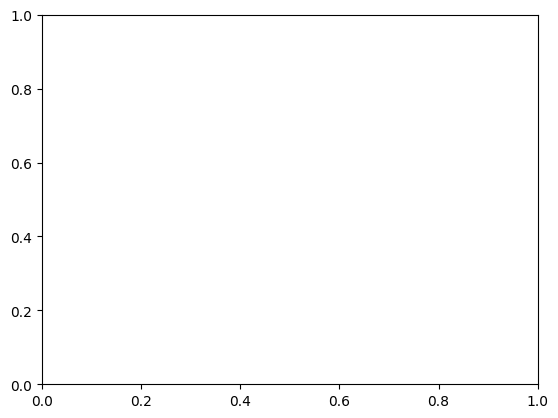

In [28]:
import librosa.display as dsp
import matplotlib.pyplot as plt

dsp.waveshow(data, sr=sample_rate)
plt.show()

In [25]:
!pip install ffprobe


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
from pydub import AudioSegment

# m4a 파일 로드
audio = AudioSegment.from_file("/Users/daniel/Desktop/TMR/overnight_record/001.m4a", format="m4a")

# wav 파일로 변환
audio.export("output_1.wav", format="wav")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'ffprobe'